# 專題分享

## 郭耀仁

## 課程內容

- House Prices: Advanced Regression Techniques
- Digit Recognizer
- Titanic: Machine Learning from Disaster
- Others

# House Prices: Advanced Regression Techniques

## 簡介

> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

> Submissions are evaluated on Root-Mean-Squared-Error (RMSE).

## 資料載入

In [1]:
import pandas as pd

train_url = "https://storage.googleapis.com/py_ml_datasets/house_prices/train.csv"
test_url = "https://storage.googleapis.com/py_ml_datasets/house_prices/test.csv"
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

## 資料外觀

In [2]:
print train.shape
print test.shape

(1460, 81)
(1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
all_data = pd.concat(
    [train.loc[:, 'MSSubClass':'SaleCondition'], test.loc[:, 'MSSubClass':'SaleCondition']], axis = 0
)
print all_data.shape

(2919, 79)


## 資料外觀（2）

- 79 個變數中有 25 個整數型別、11 個浮點數型別與 43 個文字型別

In [6]:
import numpy as np

print np.unique(all_data.dtypes.values, return_counts = True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object), array([25, 11, 43]))


In [7]:
print all_data.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond

In [8]:
total_missing = all_data.isnull().sum().sort_values(ascending=False)
missing_percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, missing_percent], axis = 1, keys = ['Total Missing', 'Missing Percent'])
missing_data.head(20)

,Total Missing,Missing Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


## 特徵工程

- 刪除遺失比例過高的變數（Top 5）
- 轉換類別型變數為數值（One-hot encoding）
- 將遺失值以中位數填補

In [9]:
all_data = all_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.median())
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
print all_data.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
                        ..
GarageFinish_RFn         0
GarageFinish_Unf         0
GarageQual_Ex            0
GarageQual_Fa            0
GarageQual_Gd            0
GarageQual_Po            0
G

In [11]:
# 整理模型的輸入
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train.SalePrice

## 模型

- Linear Regression
- Ridge
- Lasso
- ElasticNet

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
models = [lr, ridge, lasso, elasticnet]
model_names = ["Linear Regression", "Ridge", "Lasso", "Elastic Net"]

def get_rmse(model):
    mse = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
    return np.mean((-mse)**0.5)

for model_name, model in zip(model_names, models):
    print "%s: %f" % (model_name, get_rmse(model))

Linear Regression: 32315.847368
Ridge: 30351.379894


/Users/kuoyaojen/anaconda3/envs/tensorflower/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso: 31485.383881
Elastic Net: 33237.194972


## 模型（2）

- 在 Ridge 與 Lasso 中尋找合適的 `alpha`

In [13]:
# get_rmse_with_alpha
def get_rmse_with_alpha(alpha, model_name):
    ridge = Ridge(alpha = alpha)
    lasso = Lasso(alpha = alpha)
    if model_name == 'ridge':
        mse = cross_val_score(ridge, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
        return np.mean((-mse)**0.5)
    else:
        mse = cross_val_score(lasso, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
        return np.mean((-mse)**0.5)

# 納入 alpha 參數
ridge_alphas = [0.05, 0.1, 0.5, 1, 5, 10, 30, 50, 75, 100]
ridge_rmse_cv = []
print "Ridge:"
for i in range(len(ridge_alphas)):
    ridge_rmse_cv.append(get_rmse_with_alpha(ridge_alphas[i], 'ridge'))
    print "alpha = %.2f: %f" % (ridge_alphas[i], ridge_rmse_cv[i])

Ridge:
alpha = 0.05: 31818.259916
alpha = 0.10: 31495.142126
alpha = 0.50: 30600.526712
alpha = 1.00: 30351.379894
alpha = 5.00: 30030.064972
alpha = 10.00: 29912.201108
alpha = 30.00: 29926.259058
alpha = 50.00: 30097.700719
alpha = 75.00: 30331.002456
alpha = 100.00: 30552.523134


In [14]:
# 納入 alpha 參數
lasso_alphas = [0.05, 0.1, 0.5, 1, 5, 10, 30, 50, 75, 100, 125, 150, 175, 200]
lasso_rmse_cv = []
print "Lasso:"
for i in range(len(lasso_alphas)):
    lasso_rmse_cv.append(get_rmse_with_alpha(lasso_alphas[i], 'lasso'))
    print "alpha = %.2f: %f" % (lasso_alphas[i], lasso_rmse_cv[i])

Lasso:
alpha = 0.05: 31596.720015
alpha = 0.10: 31598.679349
alpha = 0.50: 31553.506607
alpha = 1.00: 31485.383881
alpha = 5.00: 31065.053792
alpha = 10.00: 30811.606187
alpha = 30.00: 30022.614500
alpha = 50.00: 29576.700502
alpha = 75.00: 29299.492040
alpha = 100.00: 29151.629872
alpha = 125.00: 29069.642997
alpha = 150.00: 29091.118743
alpha = 175.00: 29170.510634
alpha = 200.00: 29309.981064


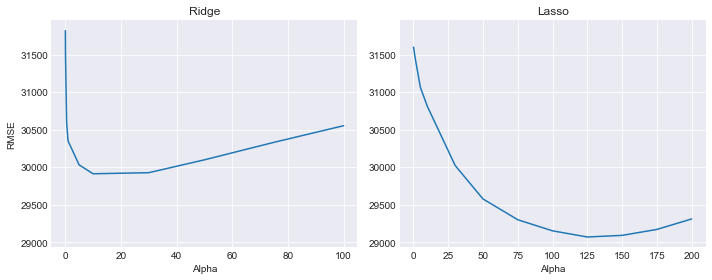

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (10, 4))
ax1 = plt.subplot(1, 2, 1)
plt.plot(ridge_alphas, ridge_rmse_cv)
plt.title("Ridge")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.subplot(1, 2, 2, sharey = ax1)
plt.plot(lasso_alphas, lasso_rmse_cv)
plt.title("Lasso")
plt.xlabel("Alpha")
plt.tight_layout()
plt.show()

## 上傳

In [16]:
lasso = Lasso(alpha = 125)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)
Id = test.Id
my_solution = pd.DataFrame(y_hat, Id, columns = ["SalePrice"])
my_solution.to_csv("my_solution.csv", index_label = ["Id"])

# Digit Recognizer

## 簡介

> MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

## 資料載入

In [3]:
import pandas as pd

train_url = "https://storage.googleapis.com/py_ml_datasets/mnist/train.csv"
test_url = "https://storage.googleapis.com/py_ml_datasets/mnist/test.csv"
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

## 資料外觀

In [18]:
print train.shape
print test.shape

(42000, 785)
(28000, 784)


In [19]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 特徵工程

- 轉換資料框為 NumPy Array

In [4]:
# 整理模型的輸入
X_train = train.iloc[:, 1:].values.astype('float32')
y_train = train.iloc[:, 0].values.astype('float32')
X_test = test.values.astype('float32')
print X_train.shape
print y_train.shape
print X_test.shape

(42000, 784)
(42000,)
(28000, 784)


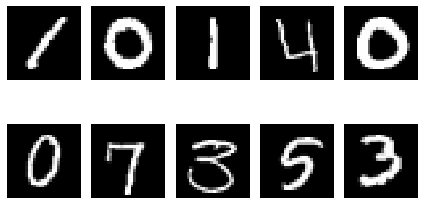

In [22]:
# X_train
for i, k in enumerate(range(1, 11)):
    plt.subplot(2, 5, k)
    plt.imshow(X_train.reshape(train.shape[0], 28, 28)[i], cmap = "gray")
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

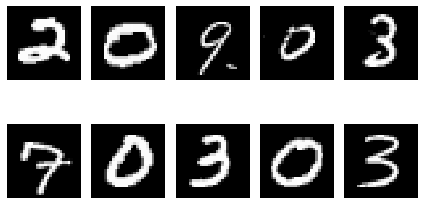

In [23]:
# X_test
for i, k in enumerate(range(1, 11)):
    plt.subplot(2, 5, k)
    plt.imshow(X_test.reshape(test.shape[0], 28, 28)[i], cmap = "gray")
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

## 模型

- 支持向量機
- 卷積神經網絡（Convolutional Neural Network，CNN）

## 支持向量機

In [24]:
from sklearn.svm import SVC

svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in svm_kernels:
    svc = SVC(kernel = kernel)
    acc = np.mean(cross_val_score(svc, X_train[:1000, :], y_train[:1000], cv = 10, scoring = 'accuracy'))
    print "%s cv accurary: %.2f%%" % (kernel, acc * 100)

linear cv accurary: 86.52%
poly cv accurary: 86.55%
rbf cv accurary: 12.40%
sigmoid cv accurary: 12.40%


## 上傳

In [26]:
svc = SVC(kernel = 'linear')
svc.fit(X_train[:1000, :], y_train[:1000])
y_hat = svc.predict(X_test)
ImageId = np.arange(1, 28001)
my_solution = pd.DataFrame(y_hat.astype('int'), ImageId, columns = ["Label"])
my_solution.to_csv("mnist/my_solution.csv", index_label = ["ImageId"])

## 卷積神經網絡（Convolutional Neural Network，CNN）

In [12]:
# 整理模型的輸入
X_train = train.iloc[:, 1:].values.astype('float32')
y_train = pd.get_dummies(train.iloc[:, 0])
y_train = y_train.values.astype('float32')
X_test = test.values.astype('float32')
print X_train.shape
print y_train.shape
print X_test.shape

(42000, 784)
(42000, 10)
(28000, 784)


In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# 讀入 MNIST
mnist = input_data.read_data_sets("mnist/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [2]:
print x_train.shape
print y_train.shape
print x_test.shape

(55000, 784)
(55000, 10)
(10000, 784)


In [28]:
import tensorflow as tf

# 自訂 next_batch() 函數
def next_batch(batch_size, t_i, t_l, iie, ec, n_e):    
    train_images = t_i
    train_labels = t_l
    index_in_epoch = iie
    epochs_completed = ec
    num_examples = n_e
    
    start = index_in_epoch
    index_in_epoch += batch_size
      
    if index_in_epoch > num_examples:
        epochs_completed += 1
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        train_images = train_images[perm]
        train_labels = train_labels[perm]
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return train_images[start:end], train_labels[start:end]

# 設定參數
n_features = 784
n_labels = 10

# 啟動 InteractiveSession
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, n_features])
y_ = tf.placeholder(tf.float32, shape=[None, n_labels])

# 自訂初始化權重的函數
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
    
# 自訂 convolution 與 max-pooling 的函數
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層是 Convolution 層（32 個神經元），會利用解析度 5x5 的 filter 取出 32 個特徵，然後將圖片降維成解析度 14x14
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# 第二層是 Convolution 層（64 個神經元），會利用解析度 5x5 的 filter 取出 64 個特徵，然後將圖片降維成解析度 7x7
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# 第三層是 Densely Connected 層（1024 個神經元），會將圖片的 1024 個特徵攤平
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# 輸出結果之前使用 Dropout 函數避免過度配適
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 第四層是輸出層（10 個神經元），使用跟之前相同的 Softmax 函數輸出結果
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# 訓練與模型評估
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_conv, labels = y_))
tf.summary.scalar("CrossEntropy", cross_entropy)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar("Accuracy", accuracy)

# 初始化
sess.run(tf.global_variables_initializer())
for i in range(200):
    #get new batch
    batch_X, batch_y = next_batch(50, X_train, y_train, 0, 0, X_train.shape[0])
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict = {x: batch_X, y_: batch_y, keep_prob: 1.0})
        print "step %i, training accuracy %.2f" % (i, train_accuracy)
    train_step.run(feed_dict={x: batch_X, y_: batch_y, keep_prob: 0.5})

# 預測
predict = tf.argmax(y_conv, 1)
predicted_labels = predict.eval(feed_dict={x: X_test[:1000, :], keep_prob: 1.0})

# 關閉 session
sess.close()

step 0, training accuracy 0.08
step 100, training accuracy 1.00


# Titanic: Machine Learning from Disaster

# Others

## Becoming a Unicorn

![](http://www.bostonmarathonmediaguide.com/wp-content/uploads/2015/01/baa-logo.jpg)

## Becoming a Unicorn（2）

- Unicorn was originally used to describe a full-stack engineer who is also a UI/UX designer
- A unicorn here we refer to one who is the mix of:
    - a statistician
    - an engineer
    - an analyst

## Becoming a Unicorn（3）

> A scientist may say "oh I'll leave it to the engineers to do that" and deliberate on theory instead.
A data hacker doesn't give a damn and will roll up their sleeves and pour into the internals of a learning algorithm, splice and dice data in sql, R, Python, spark, and whiteboard a model validation architecture while pushing the limits of theory and technology along the way. 
Get dirty with data, technology and math, nothing should be too practical enough, too theoretical enough, or too mathematical enough for you to handle.

Quoted from: Ajai Sharma @ LinkedIn

## Keep in Touch

- [Facebook](https://www.facebook.com/yaojen.kuo.1)
- [GitHub](https://github.com/yaojenkuo)

## Keep in Touch（2）

- Potential collaborations:
    - [余峻瑜](http://www.management.ntu.edu.tw/faculty/teacher/sn/129)教授的商管統計資料分析

## Keep in Touch（3）

- Upcoming events:
    - [輕鬆學習 R 語言](https://www.learn-r-the-easy-way.tw/)即將出版
    - 11 月資料科學年會有一個 Session
    - R/Python 的課程會上線到 [Udemy](https://www.udemy.com/)與[Teachable]()

## 期末意見調查

https://goo.gl/forms/CnwLEZinjLm2N5zh1